## Preparing Dataset

In [2]:
import pandas as pd
import tensorflow as tf
import re
import numpy as np
import csv
from tensorflow.keras.layers import GRU, Embedding, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle


2024-10-14 05:43:08.927115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 05:43:08.944740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 05:43:08.950639: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 05:43:08.964588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-14 05:43:09.613919: W tensorflow/compiler/tf2

In [3]:
df=pd.read_csv(f'Dataset.tsv', sep='\t')
df

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,Negative,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


In [4]:
df['sentiment_id'] = df['label'].map({'Negative': 0, 'Positive': 1, 'Mixed': 2})

In [5]:
df['sentiment_id']

0        1
1        1
2        1
3        1
4        1
        ..
99994    0
99995    0
99996    0
99997    0
99998    0
Name: sentiment_id, Length: 99999, dtype: int64

In [6]:
reviews = df['text'].values
labels= df['sentiment_id'].values

In [7]:
reviews, labels=shuffle(reviews, labels)

In [8]:
labels

array([1, 0, 1, ..., 2, 0, 0])

In [9]:
for i in range(0, 10):
  print(reviews[i], labels[i])

مسل جدا ورغم أن عمره أكثر من قرن أي قبل ظهور التلفزيون مثلا فإنه يحمل إضاءات لا تزال صحيحة رغم كل المتغيرات 1
يوجد موظف في الاستقبال تعامله جدا سيء . المطعم. يوجد موظف في الاستقبال تعامله جدا سيء 0
نايف . . موظف الاستقبال 1
مخيب للأمل. يسمح بالزوار مقابل درهم . عدم تجاوب خدمه العرفه مع الطلبات وعدم سرعة انجازها جميع غرف الفندق صغيره 0
أعجبني الكتاب وأكثر ما أبهرني فعلا هي الدقة الإملائية التي قلما نراها الأن في عالمنا العربي وحتي في أكبر الصحف .. ما قدمه أ. ثروت في هذا يعطي إنطباع أن هذا الكاتب لا يزال لديه الكثير ليقوله .. أعطاني وشرح لي تفسير لما كنت أتخيل وما كنت أسئله لنفسي دوما كيف لشخص أن يقبل أن يضع نفسه في منظومة تلغي عقله وتفكر بدلا منه وكنت دائما أرد علي نفسي وأقول هو فقط مجرد إنطباع بسبب إختلافي مع منهج الإخوان .. ولكن بعد قراءتي لهذا الكتاب وكذلك باقي كتب ثروت الخرباوي أيقنت تماما أن منهج السمع والطاعة يتطلب أشخاص من نوع خاص بمواصفات معينه ومعذرة لمن يخالفني الرأي وهذا النوع من الأشخاص قريب للخضوع أكثر منه إلي الحرية ودليل في هذا كل الأشخاص الذين لم يستطيعو الإستمرار في الج

## Preparing Tokenizer and sequences

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
tknzr = Tokenizer(lower=True, split=" ")
tknzr.fit_on_texts(reviews)

#making sequences:
X = tknzr.texts_to_sequences(reviews)
X = pad_sequences(X, padding='post', value=0)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=42)

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)

## Model Training

In [12]:
model = Sequential()
model.add(Embedding(len(tknzr.word_index)+1, 32))
model.add(Bidirectional(GRU(units = 32)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

I0000 00:00:1728873803.851215    9838 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728873803.894379    9838 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728873803.894633    9838 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728873803.895994    9838 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
X_train

array([[ 2746,   497,  2746, ...,     0,     0,     0],
       [  206,   215,    30, ...,     0,     0,     0],
       [   34, 13154,    21, ...,     0,     0,     0],
       ...,
       [ 2428,    61,   569, ...,     0,     0,     0],
       [70762,  4882,  2564, ...,     0,     0,     0],
       [   42,   738,     1, ...,     0,     0,     0]], dtype=int32)

In [15]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'best_model.keras'  # Path to save the best model
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Maximize validation accuracy
    save_best_only=True  # Save only the best model
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=3,
    batch_size=32,
    callbacks=[model_checkpoint_callback]  
)

Epoch 1/3


2024-10-14 05:43:24.588594: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 523577536 exceeds 10% of free system memory.
2024-10-14 05:43:27.430314: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /home/seif/yes/bin/../lib/libcublas.so.11: undefined symbol: cublasGetSmCountTarget


2532/2532 ━━━━━━━━━━━━━━━━━━━━ 221s 86ms/step - accuracy: 0.6012 - loss: 0.8188 - val_accuracy: 0.6792 - val_loss: 0.6814
Epoch 2/3
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 217s 86ms/step - accuracy: 0.8200 - loss: 0.4561 - val_accuracy: 0.6708 - val_loss: 0.7602
Epoch 3/3
2532/2532 ━━━━━━━━━━━━━━━━━━━━ 219s 86ms/step - accuracy: 0.9174 - loss: 0.2306 - val_accuracy: 0.6458 - val_loss: 1.0021


In [17]:
from sklearn.metrics import classification_report
model=tf.keras.models.load_model('best_model.keras')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Assuming y_pred has shape (n_samples, n_classes)

# Now use y_pred_classes in classification_report
print(classification_report(y_test, y_pred_classes, target_names=['Negative', 'Mixed', 'Positive']))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
              precision    recall  f1-score   support

    Negative       0.76      0.73      0.74      3378
       Mixed       0.72      0.74      0.73      3300
    Positive       0.59      0.61      0.60      3322

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



              precision    recall  f1-score   support

           0       0.76      0.73      0.74      3378
           1       0.72      0.74      0.73      3300
           2       0.59      0.61      0.60      3322

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



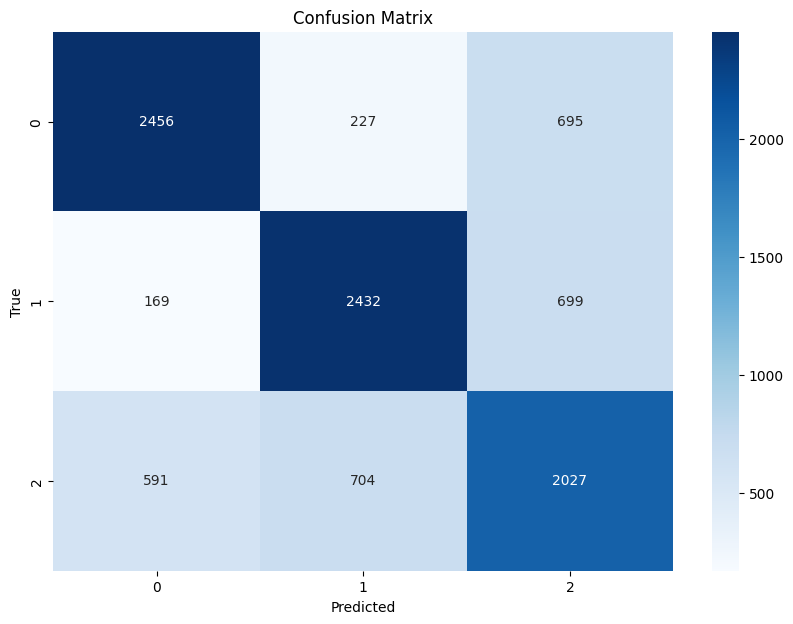

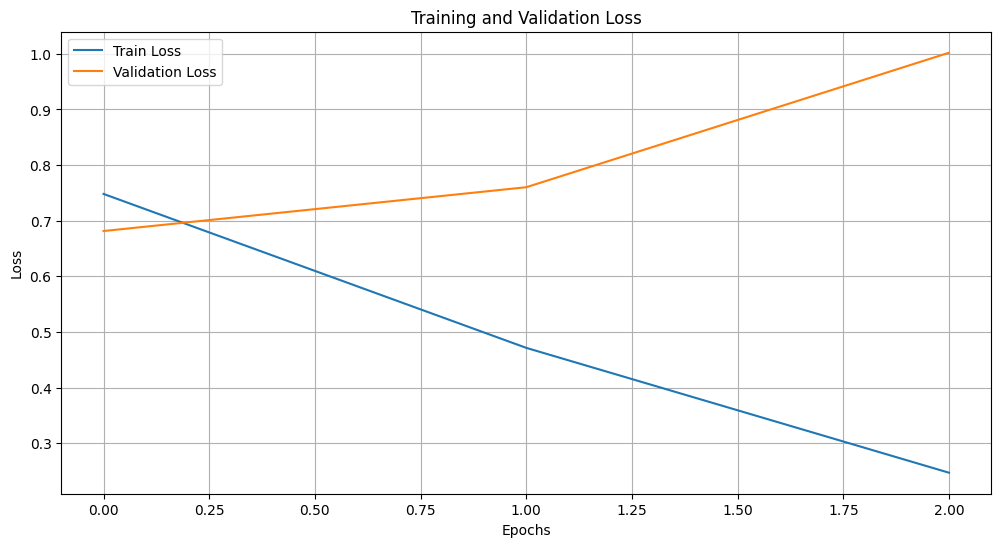

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Instead of LabelEncoder, import to_categorical
from tensorflow.keras.utils import to_categorical


# Assuming y_test contains the true labels and y_pred contains the predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Classification report
print(classification_report(y_test, y_pred_classes))

# Instead of fitting LabelEncoder to y_train, get unique classes from y_train or y_test
# Assuming y_train and y_test are one-hot encoded
# Convert y_train to class indices before getting unique classes
y_train_classes = np.argmax(y_train, axis=1)
unique_classes = np.unique(y_train_classes)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes, yticklabels=unique_classes)  # Use unique_classes for labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plotting training and validation loss curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()